## CNN Emotion Detector

##### In this notebook, we will focus on building and training a Convolutional Neural Network (CNN) model to analyze facial expressions in images. 
##### The CNN is a type of deep learning model that is particularly good at processing images. 
##### We will train our CNN to recognize different emotions based on facial expressions.

### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from mtcnn import MTCNN
from keras.models import load_model
import cv2
from keras.preprocessing.image import ImageDataGenerator  # For data augmentation
from keras.applications import VGG19  # For style transfer
from keras import backend as K  # For defining loss functions in style transfer
from keras.optimizers import Adam  # For compiling the model
from keras.preprocessing.image import img_to_array, load_img  # For loading and preprocessing images
from PIL import Image  # For image manipulation
import matplotlib.pyplot as plt  # For plotting

### Data Preparation - Data preprocessing

We load the DatasetA - FER2013 dataset and preprocess it. This involves : 
- converting the pixel values from strings to integers, 
- reshaping the data into the original image shape, 
- and normalizing the pixel values.

In [7]:
# Assuming the images are stored in subdirectories for each class
train_dir = 'C:/Μαθήματα/Διπλωματική/archive/train'
test_dir = 'C:/Μαθήματα/Διπλωματική/archive/test'

# For image data, Keras provides a useful tool called ImageDataGenerator , that helps you load and preprocess image data
from keras.preprocessing.image import ImageDataGenerator

# Initialize the ImageDataGenerator for training and testing
#rescale=1./255 argument tells it to transform every pixel value in the image by dividing it by 255. 
# This scales the pixel values from a range of 0-255 to a range of 0-1, which is a common preprocessing step in neural network models
train_datagen = ImageDataGenerator(rescale=1./255, #Note, we add data augmentation to the training data generator in order to improve the model's generalization
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


# Load the images from the train directory
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48, 48),  # All images will be resized to 48x48
        color_mode="grayscale", # converts them to grayscale
        batch_size=32, # groups them into batches of 32
        class_mode='categorical') #  treat the labels as categorical data (i.e., one-hot encoded labels)

# Load the images from the test directory
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(48, 48),
        color_mode="grayscale",
        batch_size=32,
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


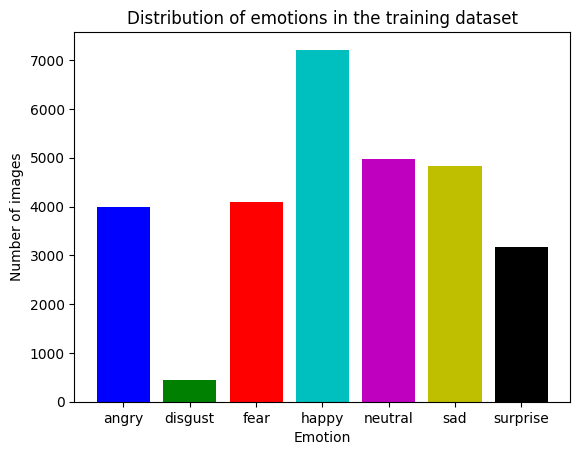

In [15]:
import os
import matplotlib.pyplot as plt

# Specify the directory where the training data is stored
train_dir = 'C:/Μαθήματα/Διπλωματική/archive/train'

# Get the list of subdirectories (each one corresponds to a class)
class_dirs = [i for i in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, i))]

# Count the number of images in each subdirectory
counts = []
for dir in class_dirs:
    counts.append(len(os.listdir(os.path.join(train_dir, dir))))

# Define a list of colors for each emotion
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # blue, green, red, cyan, magenta, yellow, black

# Create a bar chart with different colors for each emotion
plt.bar(class_dirs, counts, color=colors)
plt.xlabel('Emotion')
plt.ylabel('Number of images')
plt.title('Distribution of emotions in the training dataset')
plt.show()

We load the DatasetB with the 4000 oil paintings of art portraits.

In [16]:
# Specify the directory where the second dataset is stored
art_dir = 'C:/Μαθήματα/Διπλωματική/Portraits'

# Initialize the ImageDataGenerator for the art dataset
# Rescale normalizes the pixel values to be between 0 and 1
art_datagen = ImageDataGenerator(rescale=1./255)

# Load the images from the art directory
art_generator = art_datagen.flow_from_directory(
        art_dir,
        target_size=(48, 48),  # All images will be resized to 48x48
        color_mode="grayscale",
        batch_size=32,
        class_mode='categorical')

Found 4117 images belonging to 1 classes.


## Model Training
### Split the Data for the DatasetA
We split the data into a training set and a test set. This allows us to evaluate the performance of our model on unseen data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Define and Train the model 
We define our CNN model for facial expression recognition and train it on our preprocessed data.

In [ ]:
# Initialize the model
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the tensor output from the previous layer
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(units=128, activation='relu'))

# Add the output layer
model.add(Dense(units=7, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

### Save the model 
After training, we save our model so that we can use it later without having to retrain it.

In [ ]:
model.save('expression_model.h5')

### Style Transfer 
If the paintings are highly stylized or abstract, consider using style transfer to make the FER2013 images look more like paintings. This could potentially improve the performance of the model on paintings.

### Model Fine-tuning
If we have a labeled dataset of paintings with facial expressions, use this to fine-tune your model after pre-training it on the FER2013 dataset.

### Face Detection
Implement a face detection system using a model like MTCNN. This system should take a painting as input and output the locations and bounding boxes of any faces in the painting.

### Emotion Prediction
- For each new painting, use the face detection system to locate any faces in the painting.
- Extract the faces from the painting and preprocess them to match the input that your CNN model expects.
- Feed the preprocessed faces into the CNN model to predict the facial expressions.
- Postprocess the model's output to get a final emotion prediction for each face. This typically involves taking the emotion with the highest predicted probability.

### Result Interpretation
Interpret the model's predictions to determine the overall emotion that the painting is expressing. This could be as simple as taking the most common emotion among all the faces, or it could involve a more complex analysis.